<a href="https://colab.research.google.com/github/alexandre858/DataMinig/blob/main/Projet_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
#Partie 1 du programme 
#Annotation et classification
import os,sys
import json
import pathlib
import pandas
from PIL import Image
import matplotlib.pyplot as plot
import numpy
import math
from sklearn.cluster import MiniBatchKMeans

try:
   os.mkdir('data')
except:
    pass


donnees=[]


 
path = '.'
 
files = os.listdir(path+"/images")

i=1
for name in files:
  if os.path.isfile("images/"+name):
    
    imgfile = Image.open("images/"+name)

    #algoritme qui détermine la couleur dominante d'une image
    #---------------------------------------------------
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if len(numarray.shape) ==2:

      cluster_count = 5

      clusters = MiniBatchKMeans(n_clusters = cluster_count)
      clusters.fit(numarray)

      npbins = numpy.arange(0, cluster_count + 1)
      histogram = numpy.histogram(clusters.labels_, bins=npbins)




      index_max=numpy.where(histogram[0]==max(histogram[0]))

      histogram[0][index_max]=0

      index_max=numpy.where(histogram[0]==max(histogram[0]))

      histogram[0][index_max]=0

      index_max_sec=numpy.where(histogram[0]==max(histogram[0]))

      col_dom_r=math.ceil(clusters.cluster_centers_[index_max[0][0]][0])
      col_dom_g=math.ceil(clusters.cluster_centers_[index_max[0][0]][1])
      col_dom_b=math.ceil(clusters.cluster_centers_[index_max[0][0]][2])
    else:
      col_dom_r=500
      col_dom_g=500
      col_dom_b=500



    #---------------------------------------------------

    #analyse taux de présence couleu
    #---------------------------------------------------
    histogram = imgfile.histogram()
    if (len(histogram)==1024 or len(histogram)==768):

      red = histogram[0:255]
      green = histogram[256:511]
      blue = histogram[512:767]

      total_red=0
      total_blue=0
      total_green=0

      j=0
      while j <255:
        total_red=total_red+red[j]*j
        total_blue=total_blue+blue[j]*j
        total_green=total_green+green[j]*j
        j+=1

    else:
      total_red = 0
      total_green = 0
      total_blue = 0
    #---------------------------------------------------

    #récupération des données sur le format de l'image
    #---------------------------------------------------
    hauteur=imgfile.size[0]
    largeur=imgfile.size[1]
    format=imgfile.format
    #---------------------------------------------------

    #mise en place des données dans un fichier json
    #---------------------------------------------------
    dele=4
    if (imgfile.format=="JPEG"):
      dele=5


    donnees.append({"name":name[:-dele],"size_high":hauteur,
                    "size_lenght":largeur,"format":format,
                      "red":total_red,"green":total_green,"blue":total_blue,
                        "col_dom_r":col_dom_r,"col_dom_g":col_dom_g,"col_dom_b":col_dom_b})


    i=i+1 

with open("data/data.json", "w") as file:
    json.dump(donnees, file,indent = 3)
#---------------------------------------------------







[0, 0, 174231, 543611, 578899, 306481, 154161, 184644, 0, 166941, 89122, 410211, 342388, 0, 0, 192191, 222072, 0, 978102, 545979, 0, 490953, 0, 0, 484314, 705765, 397286, 270923, 154586, 232870, 169995, 254382, 0, 0, 0, 325169, 161709, 607657, 172547, 0, 300221, 312174, 281409, 575510, 0, 0, 580250, 377455, 473499, 0, 130157, 262281, 0, 839583, 308158, 0, 0, 0, 236002, 299811, 149357, 0, 440853, 238151, 0, 413764, 150512, 577080, 634046, 0, 344402, 202137, 234910, 214763, 0, 0, 544275, 258441, 669135, 211826, 0, 397268, 192714, 455523, 210833, 221201, 363826, 0, 0, 0, 251454, 590754, 553427, 321018, 98842, 258612, 317521, 149741, 0, 344513, 1054169, 206012, 360685, 226386, 114107, 181336, 210214, 0, 314333, 368242, 125916, 160826, 346983, 518972, 615212, 302576, 1174802, 318812, 309995, 875480, 373005, 296402, 0, 0, 192072, 170780, 182798, 0, 185105, 168089, 233681, 154909, 0, 461304, 0, 536312, 310423, 224384, 156951, 207022, 309250, 0, 318068, 387356, 0, 314069, 163344, 268475, 27965

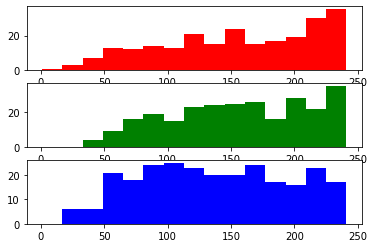

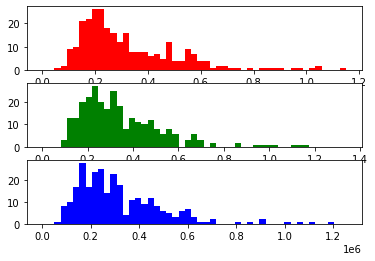

In [143]:
#visualisation
import matplotlib.pyplot as plot
import math
import json

jsondata = json.load(open('data/data.json'))
list_col = ["col_dom_r","col_dom_g","col_dom_b","red","green","blue"]

list_dom_r=[]
list_dom_g=[]
list_dom_b=[]

list_r=[]
list_g=[]
list_b=[]

list_list=[list_dom_r,list_dom_g,list_dom_b,list_r,list_g,list_b]

for data in jsondata:
  for i in range (0,6):
    list_list[i].append(data[list_col[i]])

print(list_list[3])
fig, axs = plot.subplots(3)
axs[0].hist(list_list[0],range(1,256,16),color='red')
axs[1].hist(list_list[1],range(1,256,16),color='green')
axs[2].hist(list_list[2],range(1,256,16),color='blue')
plot.show()
fig, axes = plot.subplots(3)
axes[0].hist(list_list[3],range(1,max(list_list[3]),math.ceil((max(list_list[3])-min(list_list[3]))/50)),color='red')
axes[1].hist(list_list[4],range(1,max(list_list[4]),math.ceil((max(list_list[4])-min(list_list[4]))/50)),color='green')
axes[2].hist(list_list[5],range(1,max(list_list[5]),math.ceil((max(list_list[5])-min(list_list[5]))/50)),color='blue')
plot.show()

In [71]:
#test découpage couleur
col_dom_g
from pandas.io.json import json_normalize
import pandas as pd
import json

jsondata = json.load(open('data/data.json'))
color=["col_dom_r","col_dom_g","col_dom_b"]
inter=[(0,100),(100,156)]
for data in jsondata:
  for i in range (0,3):
      print(data[color[i]]in range(200,250))
      print(data[color[i]])





True
218
True
204
False
162
True
247
False
250
False
251
False
192
False
141
False
187
False
135
False
162
False
177
False
NaN
False
NaN
False
NaN
True
249
True
242
False
67
False
NaN
False
NaN
False
NaN
False
165
False
149
False
171
False
NaN
False
NaN
False
NaN


In [ ]:
#test taux de presence
from PIL import Image
import matplotlib.pyplot as plot

path = '.'
 
files = os.listdir(path+"/images_test")

i=1
for name in files:
  if os.path.isfile("images_test/"+name):

imgfile = Image.open("./images/archeops.png")


histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

total_red=0
total_blue=0
total_green=0

i=0
while i <255:
  total_red=total_red+red[i]*i
  total_blue=total_blue+blue[i]*i
  total_green=total_green+green[i]*i
  i+=1


print(total_red,total_blue,total_green)





 

334382 511705 574290


In [82]:
#test kmeans
import os,sys
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans


path = '.'
 
files = os.listdir(path+"/images")

i=1
for name in files:
  if os.path.isfile("images/"+name):
    imgfile = Image.open("images/"+name)
    #numarray=numpy.zeros((imgfile.size[0]*imgfile.size[1],4))
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if (len(numarray.shape)!=2):
        numarray= numarray.reshape(3600,4)
        #print(name,numarray)
    #cluster_count = x 
    
    #clusters = MiniBatchKMeans(n_clusters = cluster_count)
    #clusters.fit(numarray)
    
   # npbins = numpy.arange(0, cluster_count + 1)


######
    cluster_count = 4
    clusters = MiniBatchKMeans(n_clusters = cluster_count)

    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count+1 )
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    print (clusters)
    index_max=numpy.where(histogram[0]==max(histogram[0]))

    #print(histogram[0],index_max)

    histogram[0][index_max]=0

    index_max=numpy.where(histogram[0]==max(histogram[0]))


    #print(histogram[0],index_max)

    histogram[0][index_max]=0

    index_max_sec=numpy.where(histogram[0]==max(histogram[0]))

    #print(histogram[0],index_max_sec)

    #print(clusters.cluster_centers_,index_max)

    #print("couleur dominante rgb :" ,math.ceil(clusters.cluster_centers_[index_max[0][0]][0]),
            #math.ceil(clusters.cluster_centers_[index_max[0][0]][1]) ,
              #math.ceil(clusters.cluster_centers_[index_max[0][0]][2] ) )

    #print("couleur secondaire rgb :" ,math.ceil(clusters.cluster_centers_[index_max_sec[0][0]][0]),
            #math.ceil(clusters.cluster_centers_[index_max_sec[0][0]][1]) ,
              #math.ceil(clusters.cluster_centers_[index_max_sec[0][0]][2] ) )




MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
